In [1]:
#Paquetes instalados
# !pip install outlier_utils
# !pip3 install -U matplotlib

In [2]:
from outliers import smirnov_grubbs as grubbs ## Paquete con el Test de Grubbs
import matplotlib.pyplot as plt ## Paquete para generar gráficas
import numpy as np ## Paquete para 



In [3]:
plt.style.use("Solarize_Light2")

In [4]:
from scipy.stats import t
def G(Y):
    return max(np.abs(Y-Y.mean())) / Y.std()
def grubbs_test(G, N, alpha):
    p_1 = (N - 1) / (np.sqrt(N))
    p_2 = sqrt()
    return
def calculate_critical_value(size, alpha):
    """Calculate the critical value with the formula given for example in
    https://en.wikipedia.org/wiki/Grubbs%27_test_for_outliers#Definition
    Args:
        ts (list or np.array): The timeseries to compute the critical value.
        alpha (float): The significance level.
    Returns:0
        float: The critical value for this test.
    """
    t_dist = t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    return critical_value

In [5]:
?t.ppf

### Generar un conjunto de N = 1000 valores con distribución gaussiana, con m = 10 y s = 3.0.


In [6]:
np.random.seed(100)
X = np.random.normal(10, 3, 1000)
alpha = 0.05
N_1 = len(X)

In [7]:
G(X) > calculate_critical_value(N_1, alpha)

False

La prueba de no anómalias no se rechaza

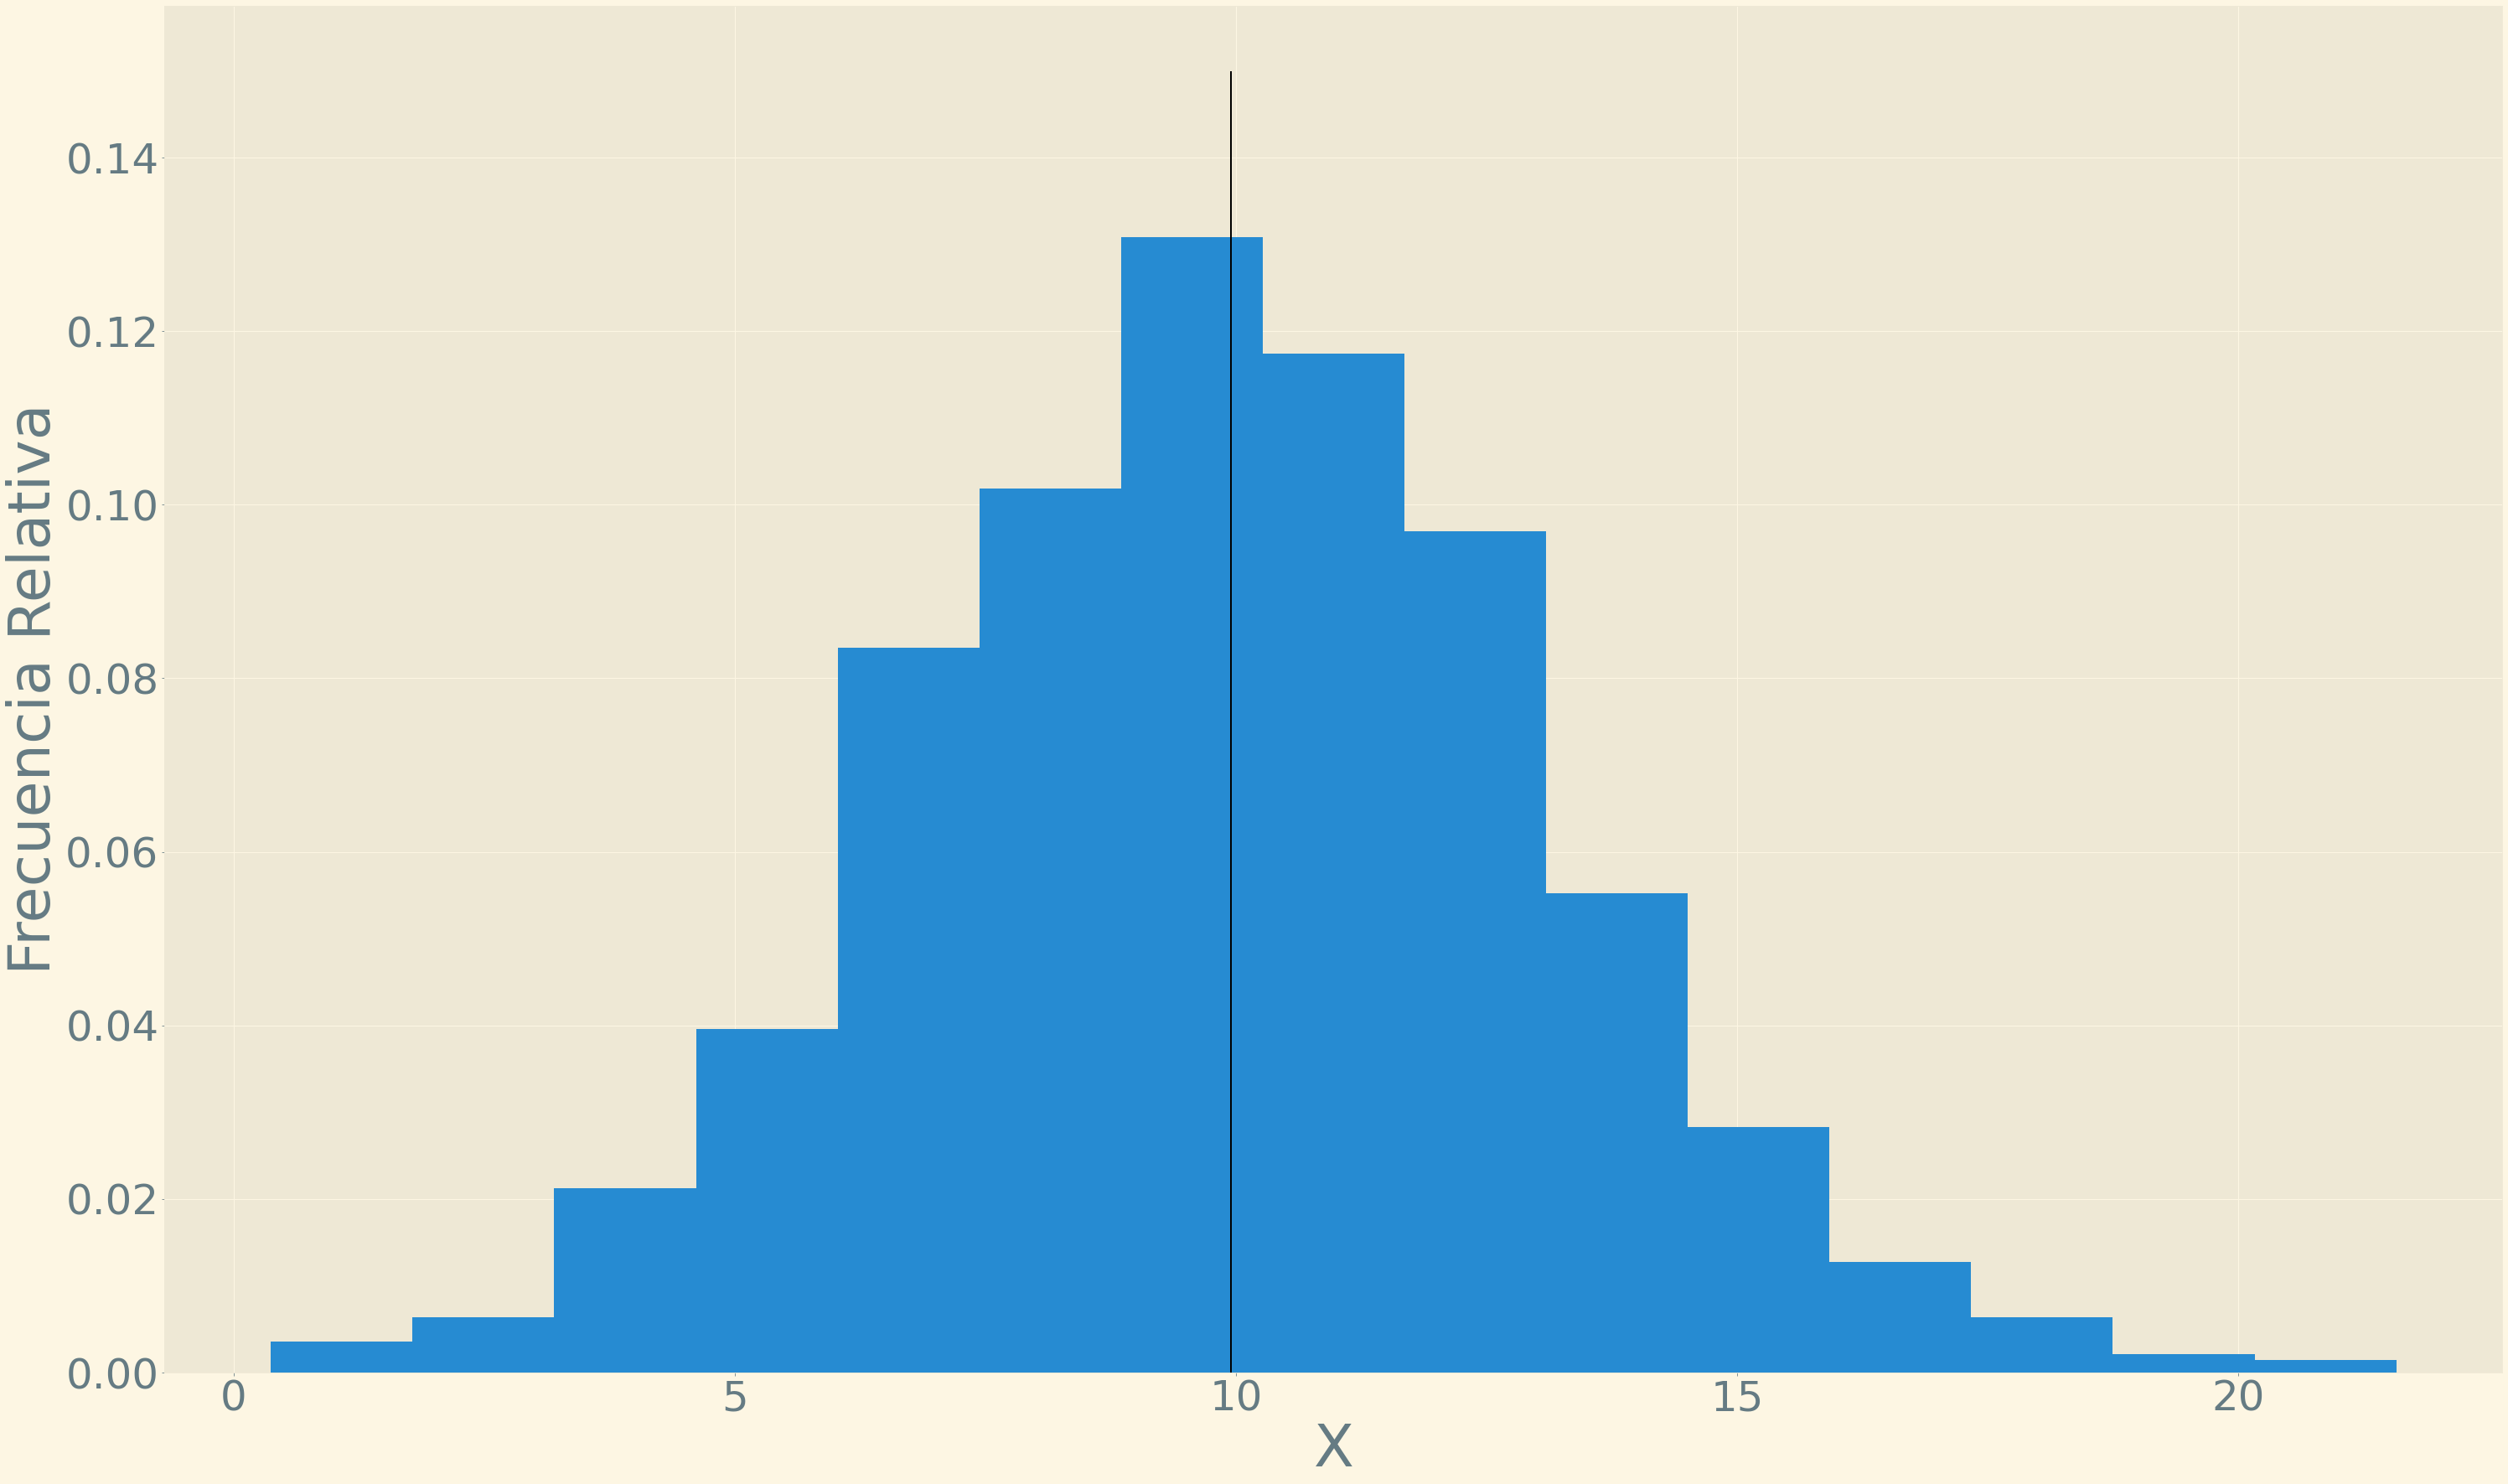

In [11]:
fig = plt.figure(figsize = (50, 30))
plt.hist(X, bins = 15, density = True, label = "Mean");
plt.xlabel("X", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Frecuencia Relativa", fontsize = 70)
plt.yticks(fontsize = 50)
plt.vlines(np.mean(X), 0, 0.15, color = "black");

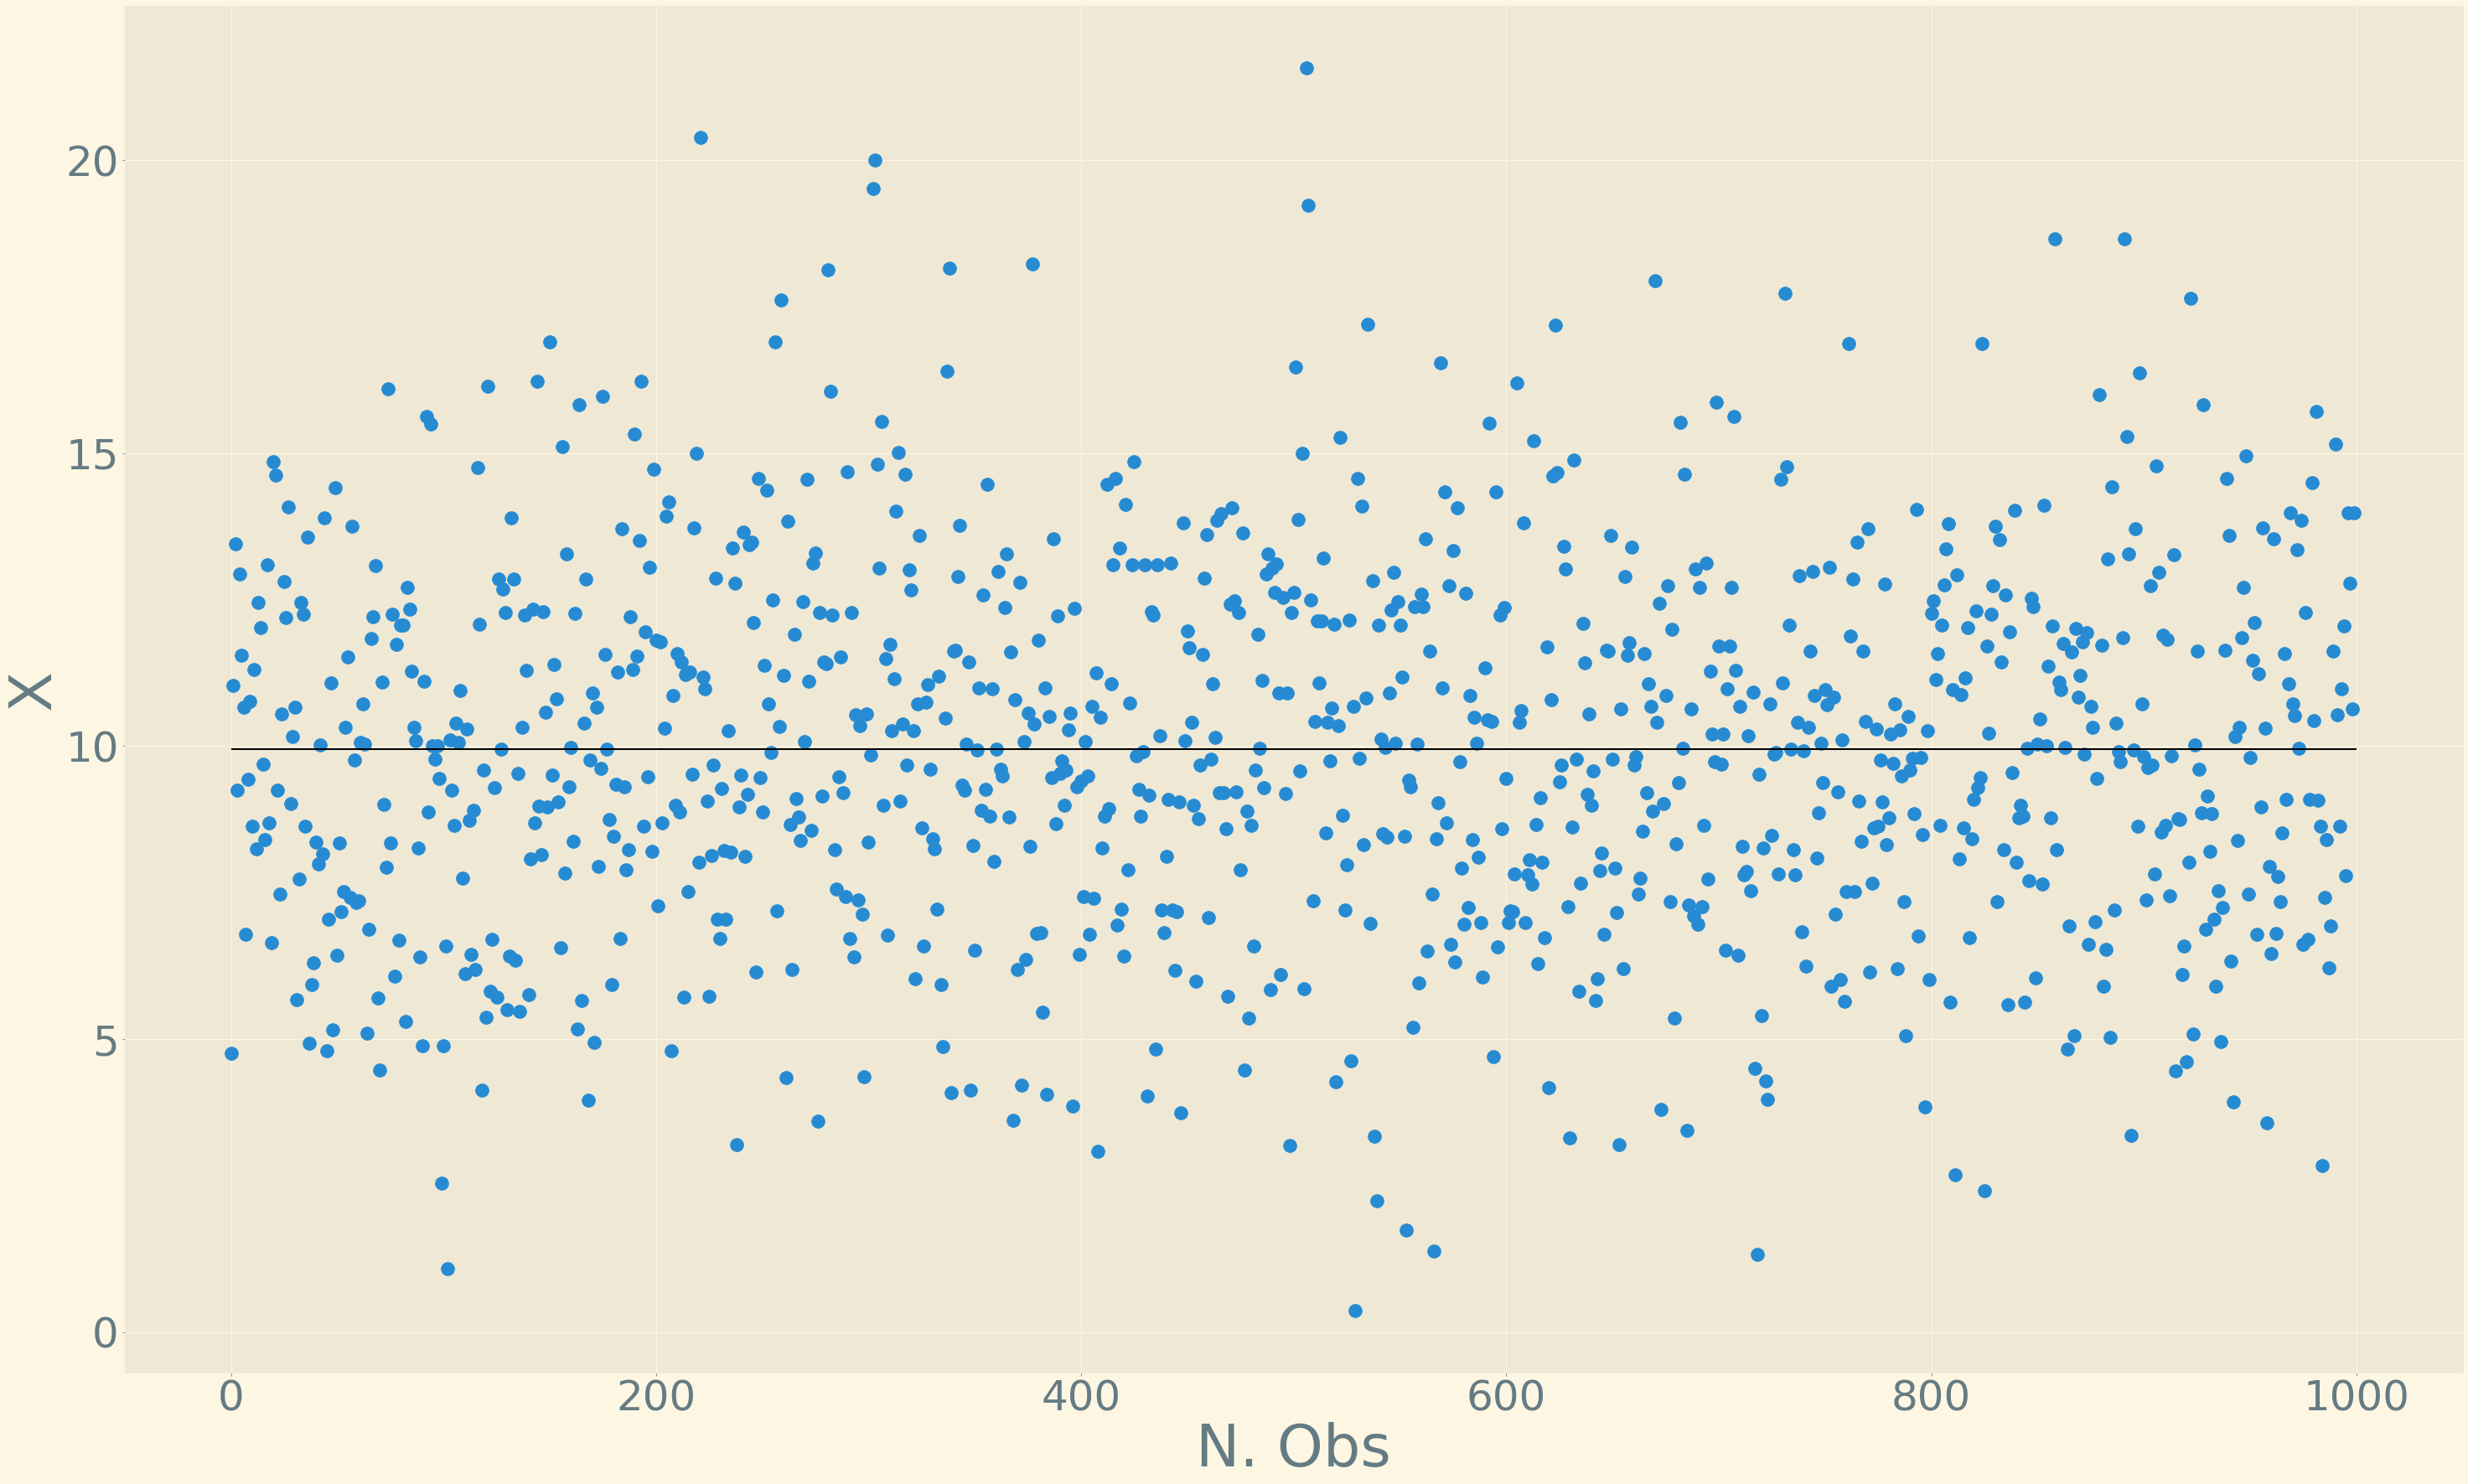

In [12]:
fig = plt.figure(figsize = (50, 30))
plt.scatter(range(N_1),X, s = 244, )
plt.xlabel("N. Obs", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("X", fontsize = 70)
plt.yticks(fontsize = 50)
plt.hlines(np.mean(X), 0, N_1, color = "black");

In [14]:
impacto = np.min(X) - 1
G_historico = []
critical_value_historico = []
impacto_historico = []
std_proporcion_historico = []
N = N_1
while True:
    X = np.append(X, impacto)# np.mean(X)) 
    N += 1
    G_ = G(X)
    std_proporcion = (np.mean(X) - impacto) / np.std(X)
    critical_value = calculate_critical_value(N, alpha)
    print("Impacto: {}, Grubbs Critical Value: {}, G:{}, Proporción std: {}".format(round(impacto,2), round(critical_value,2), round(G_,2),  round(std_proporcion,2)))
    print(G_)
    G_historico.append(G_)
    critical_value_historico.append(critical_value)
    impacto_historico.append(impacto)
    std_proporcion_historico.append(std_proporcion)
    if G_ > critical_value:
        break
    impacto -= 1
    

Impacto: -1.63, Grubbs Critical Value: 4.04, G:3.67, Proporción std: 3.64
3.6701421436715393
Impacto: -2.63, Grubbs Critical Value: 4.04, G:3.92, Proporción std: 3.92
3.924794309104319
Impacto: -3.63, Grubbs Critical Value: 4.04, G:4.2, Proporción std: 4.2
4.198164644382727


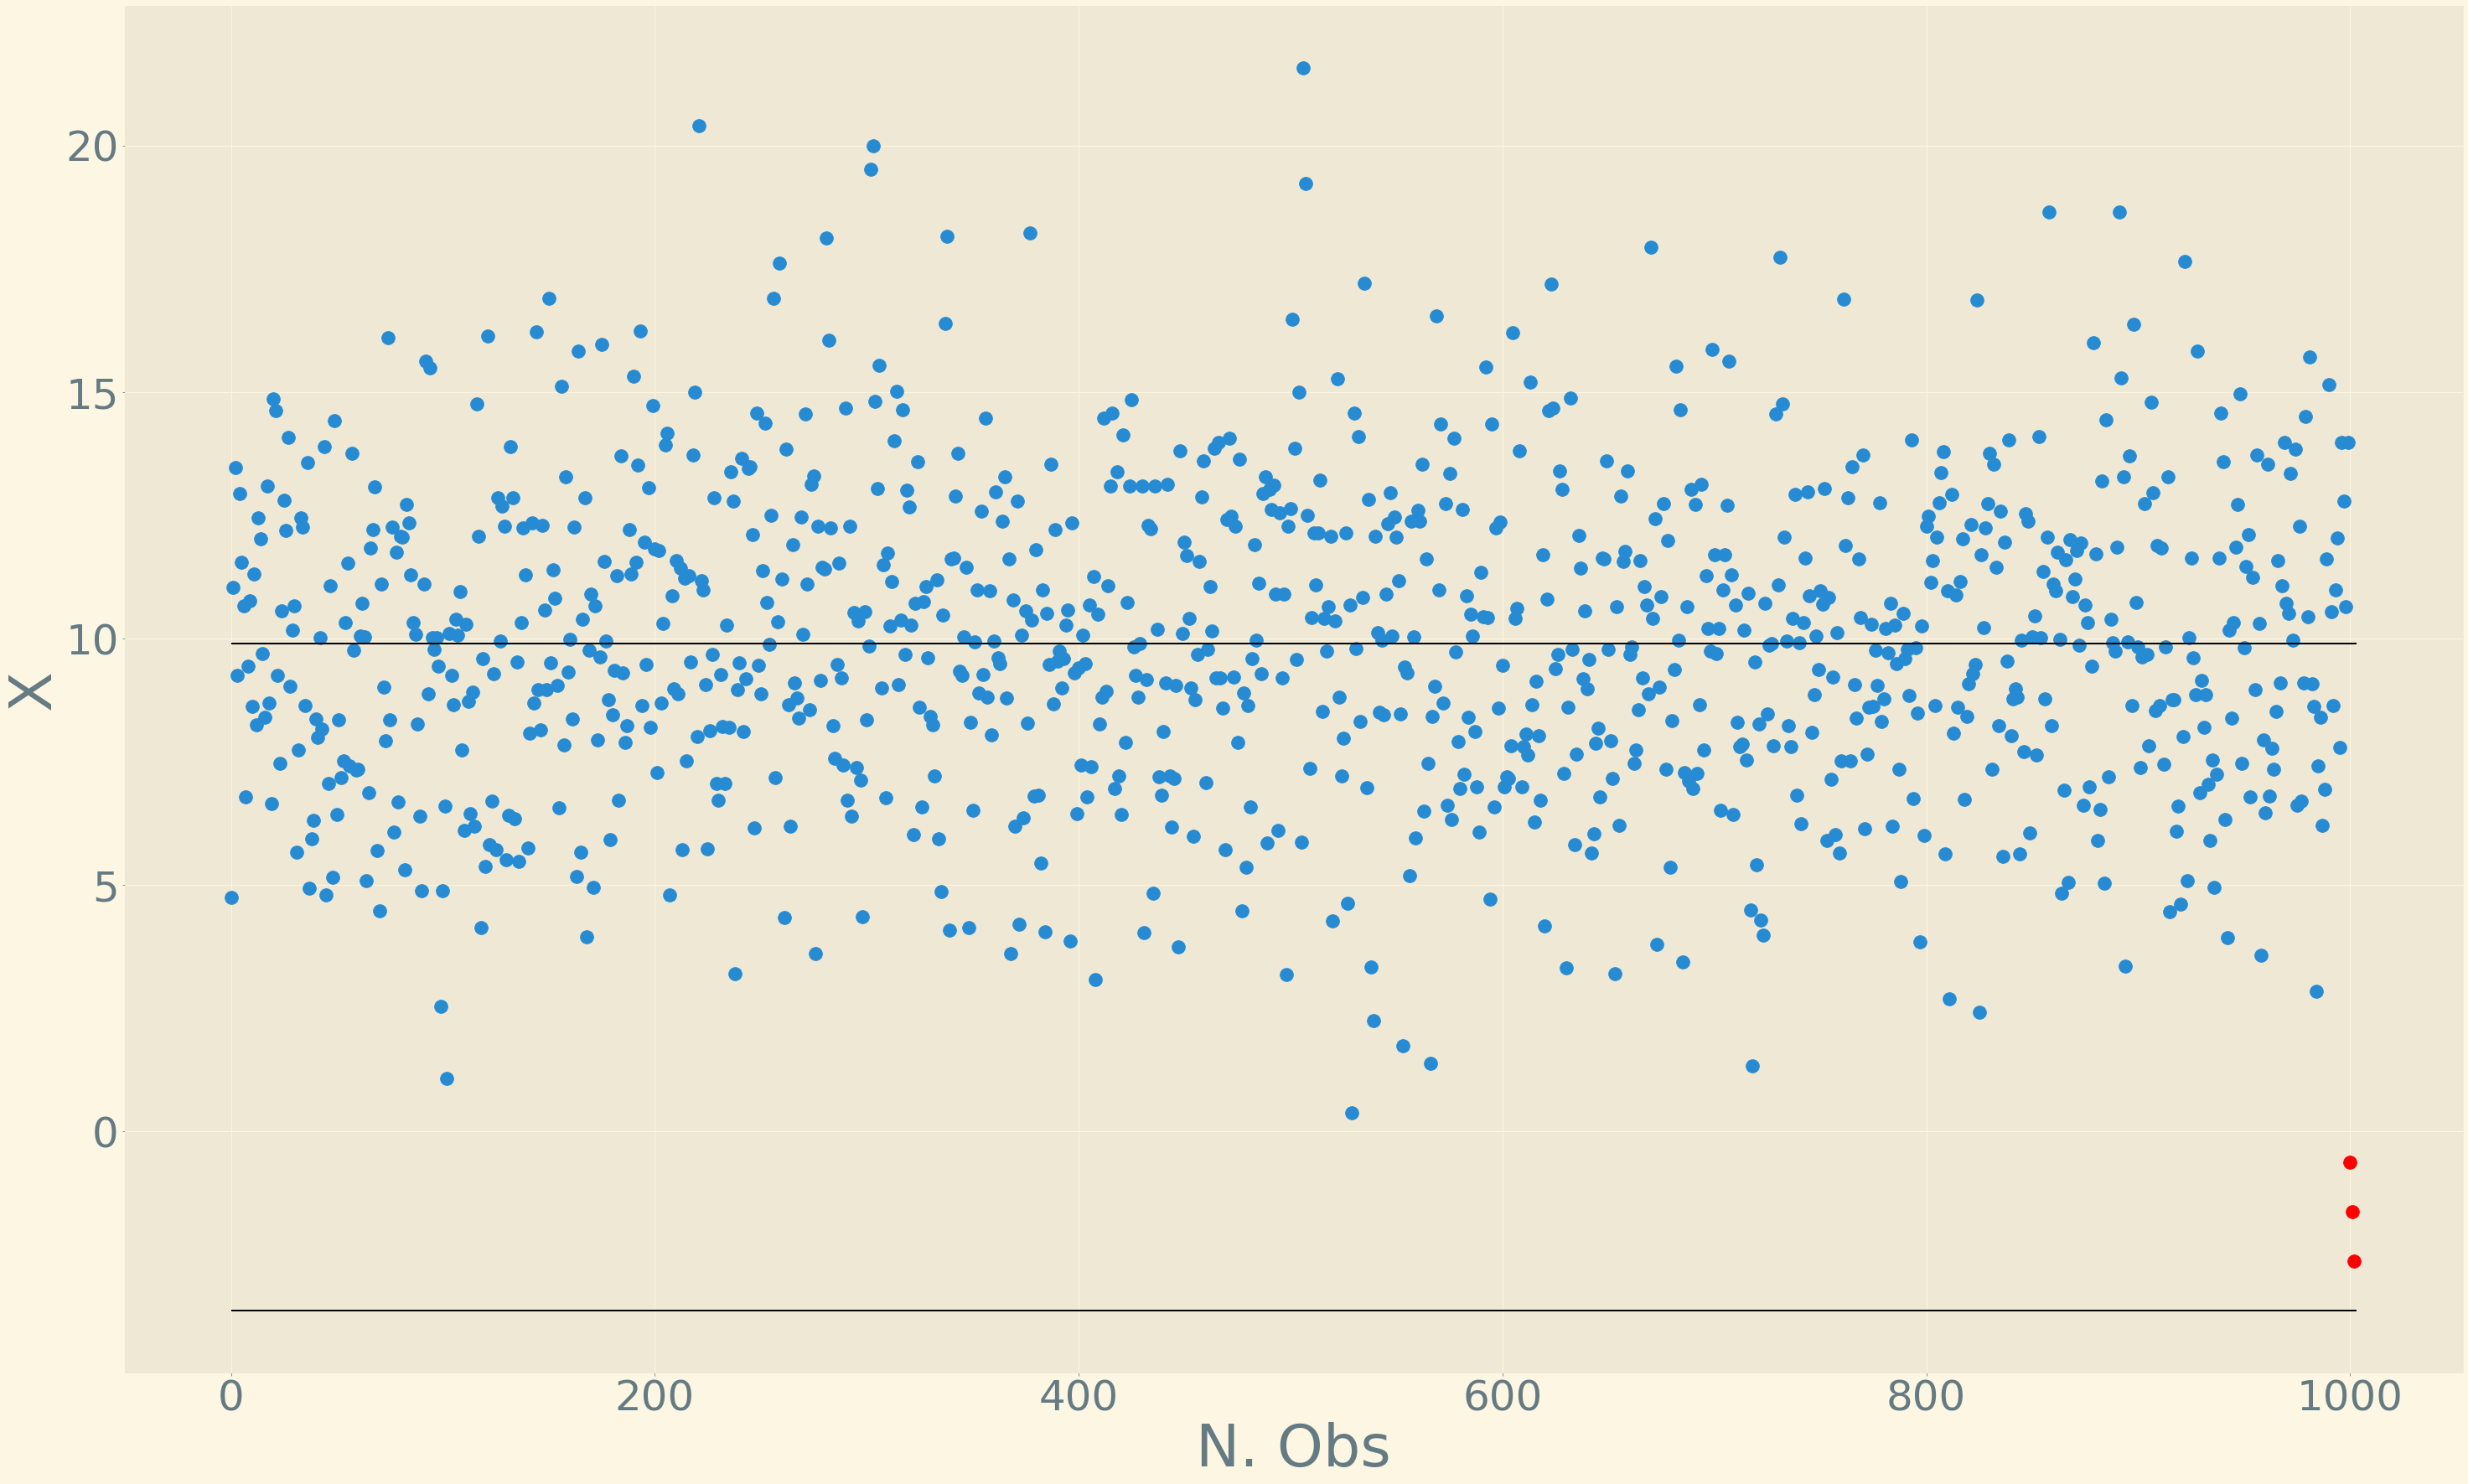

In [18]:
fig = plt.figure(figsize = (50, 30))
plt.scatter(range(N_1),X[:N_1], s = 244, label = "original")
plt.scatter(range(N_1, N),X[N_1: N], s = 244, label = "impactos", c = "r")

plt.xlabel("N. Obs", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("X", fontsize = 70)
plt.hlines(impacto, 0, N, color = "black")
plt.yticks(fontsize = 50)
plt.hlines(np.mean(X), 0, N, color = "black");

In [30]:
alphas = np.logspace(0, 1, 10000) /10
T_historico = []
salto = 0.3
X_base = np.random.normal(10, 3, 1000)
N_1 = X_base.shape[0]
impacto_base = np.min(X_base)
G_base = G(X_base)
std_historico = []
mean_historico = []
for alpha in alphas:  
    X = X_base.copy()
    N = N_1
    critical_value = calculate_critical_value(N, alpha)
    G_ = G_base
    impacto = impacto_base
    while G_ < critical_value:
        impacto -= salto
        X = np.append(X, impacto)
        N += 1
        critical_value = calculate_critical_value(N, alpha)
        G_ = G(X)
    T_historico.append((np.mean(X) - impacto) / np.std(X))
    std_historico.append(np.std(X))
    mean_historico.append(np.mean(X))
    
    

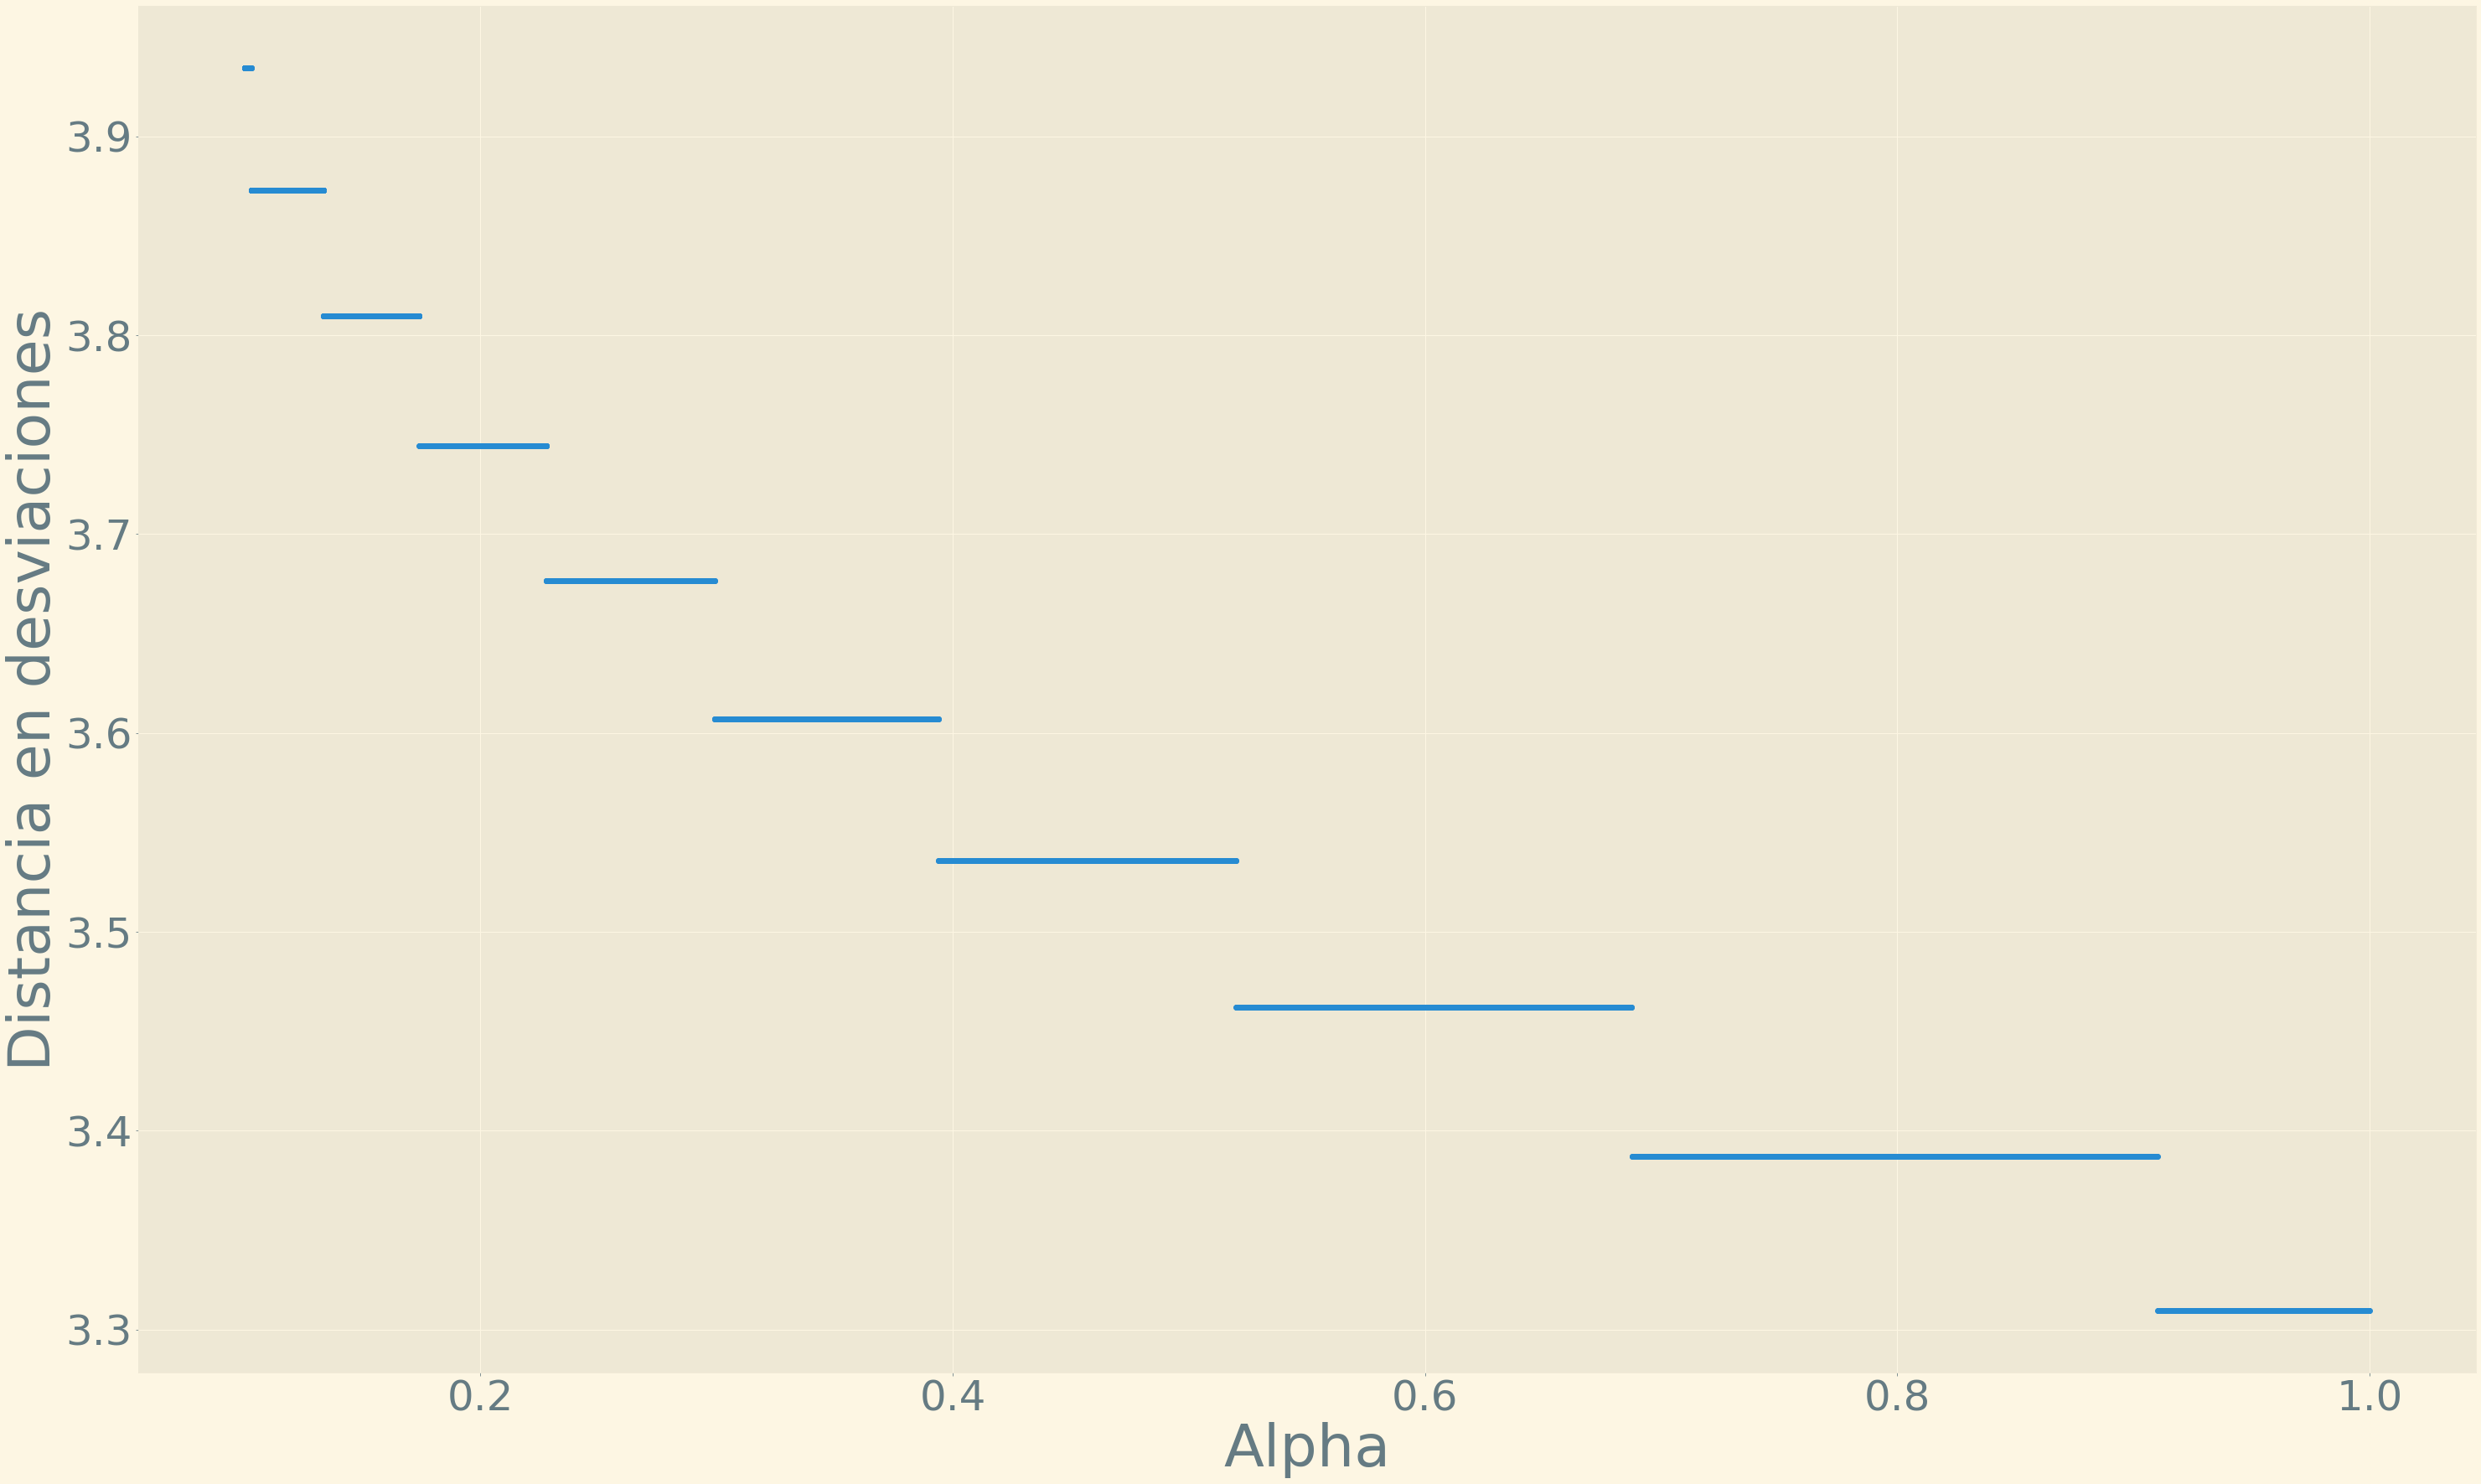

In [31]:

fig = plt.figure(figsize = (50, 30))
plt.scatter(alphas, T_historico)
plt.xlabel("Alpha", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Distancia en desviaciones", fontsize = 70)
plt.yticks(fontsize = 50);

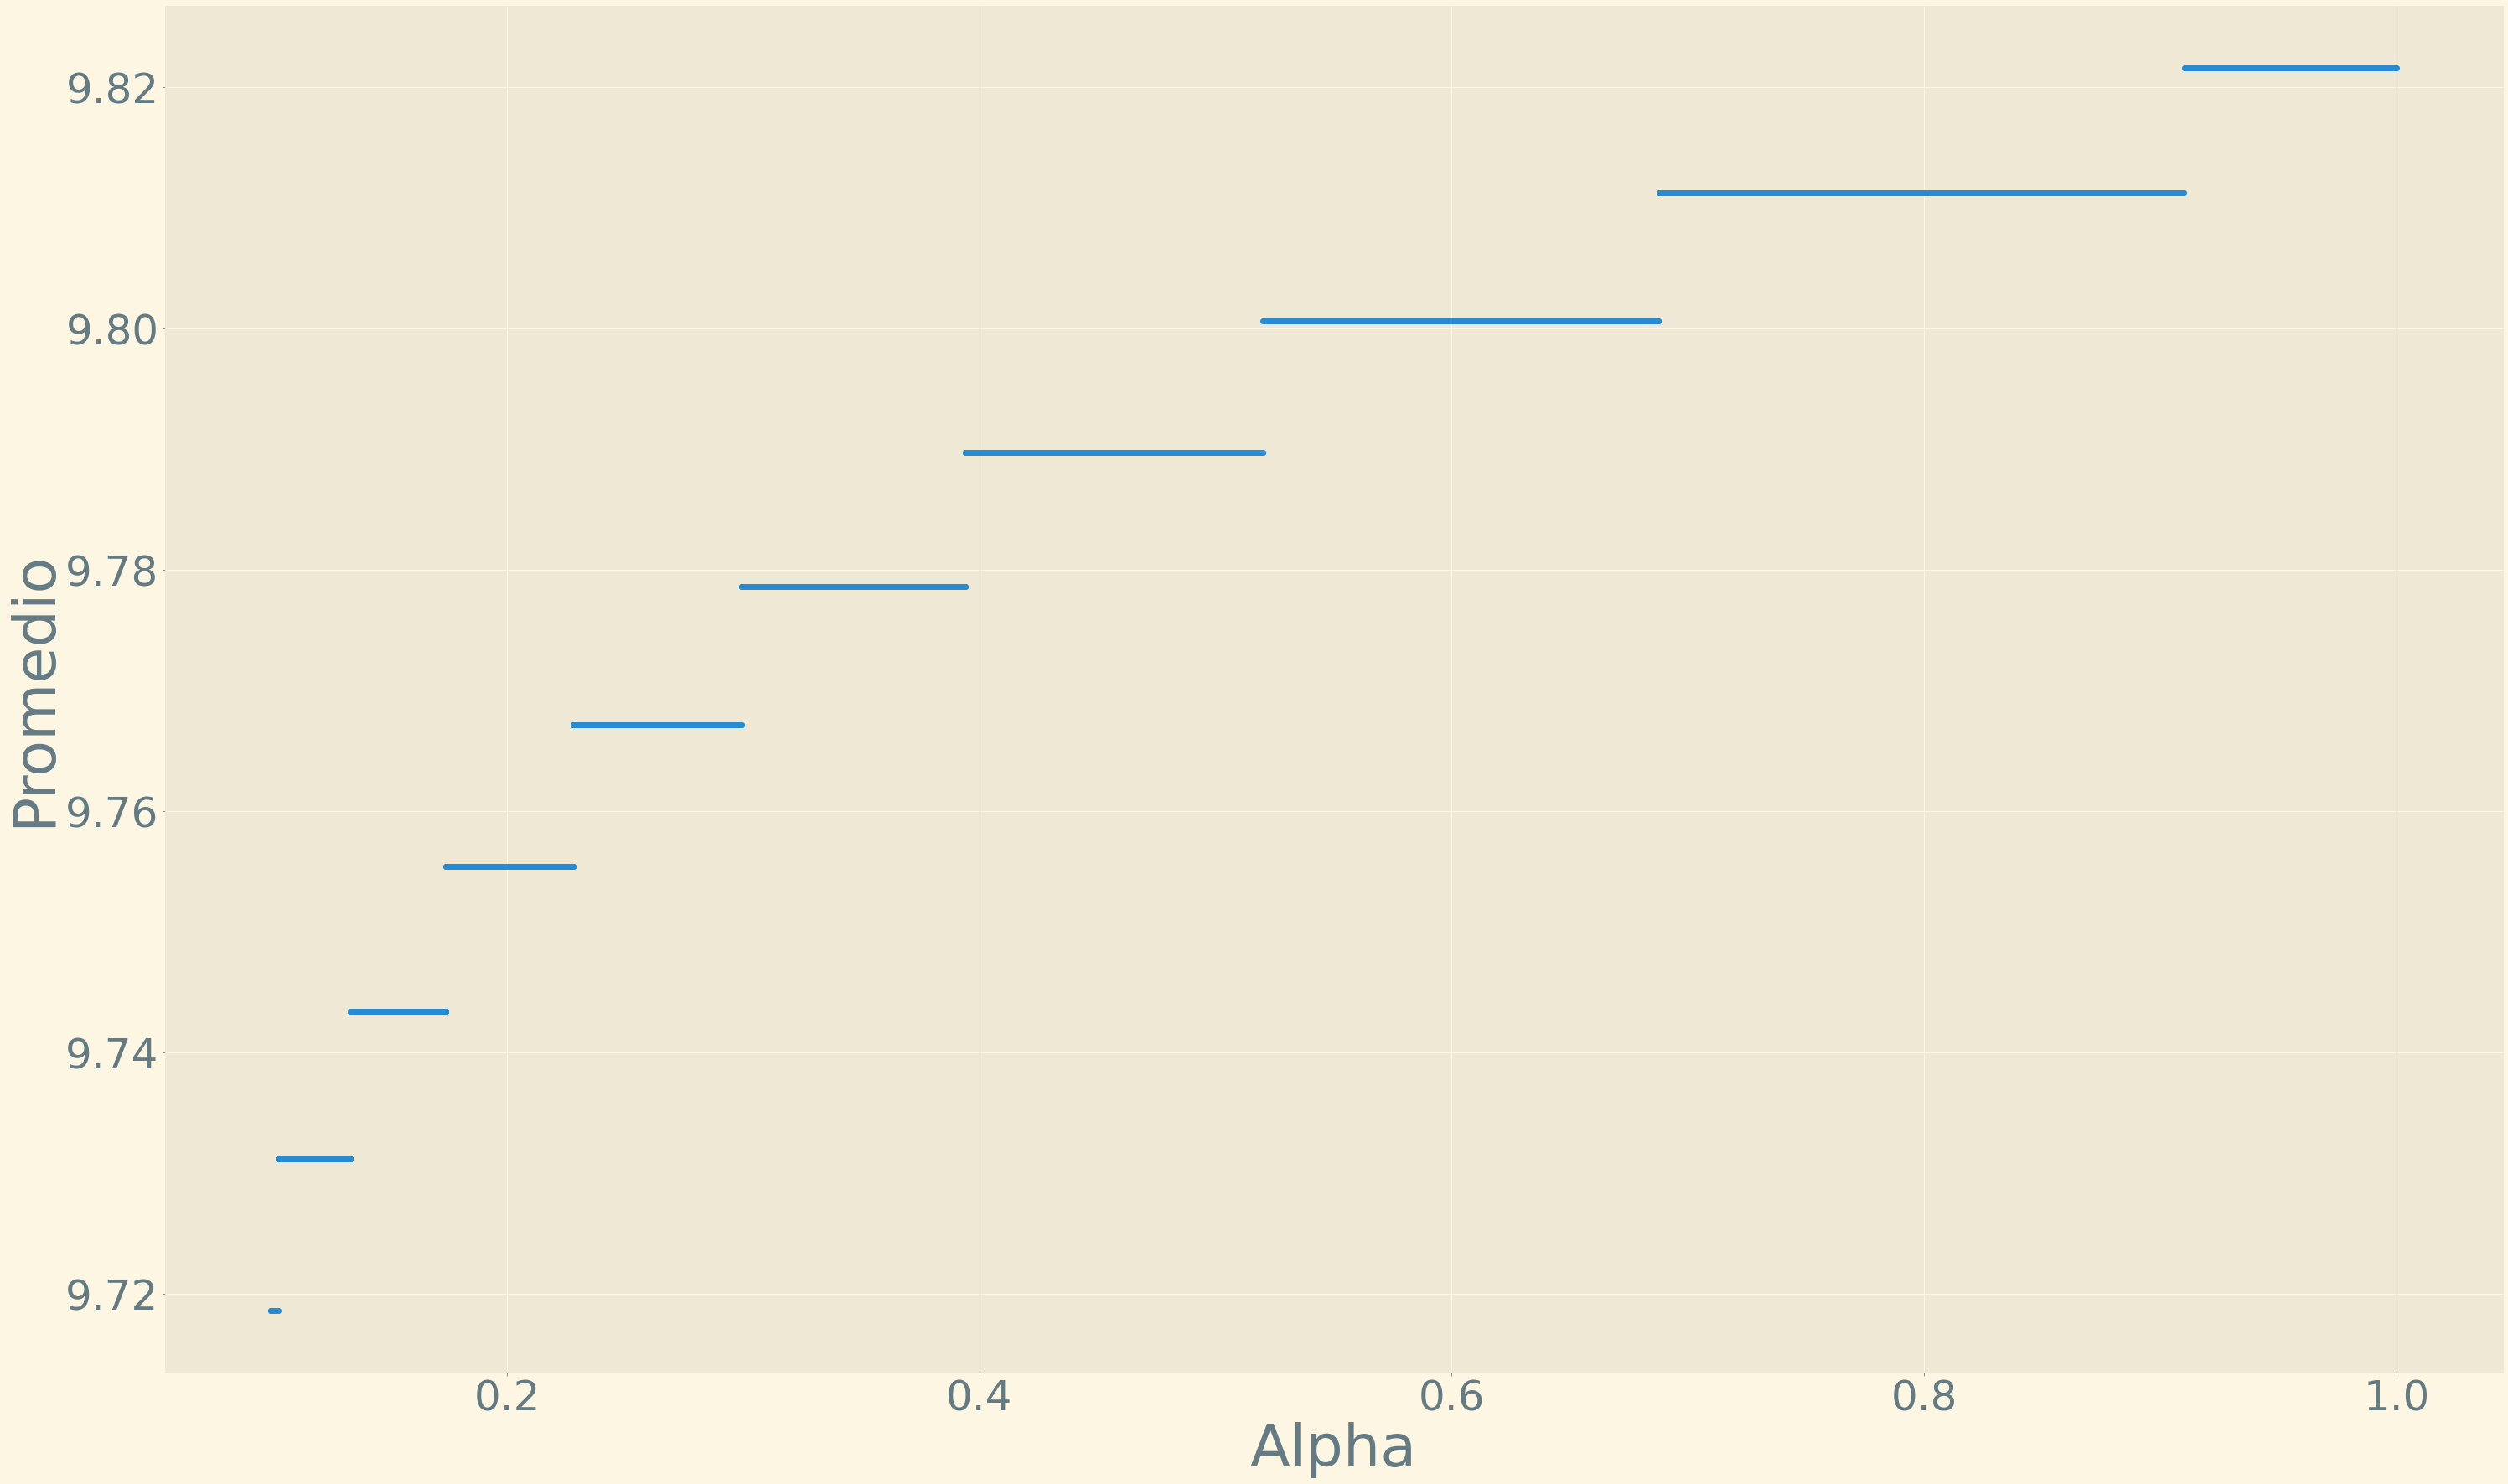

In [32]:

fig = plt.figure(figsize = (50, 30))
plt.scatter(alphas, mean_historico)
plt.xlabel("Alpha", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Promedio", fontsize = 70)
plt.yticks(fontsize = 50);

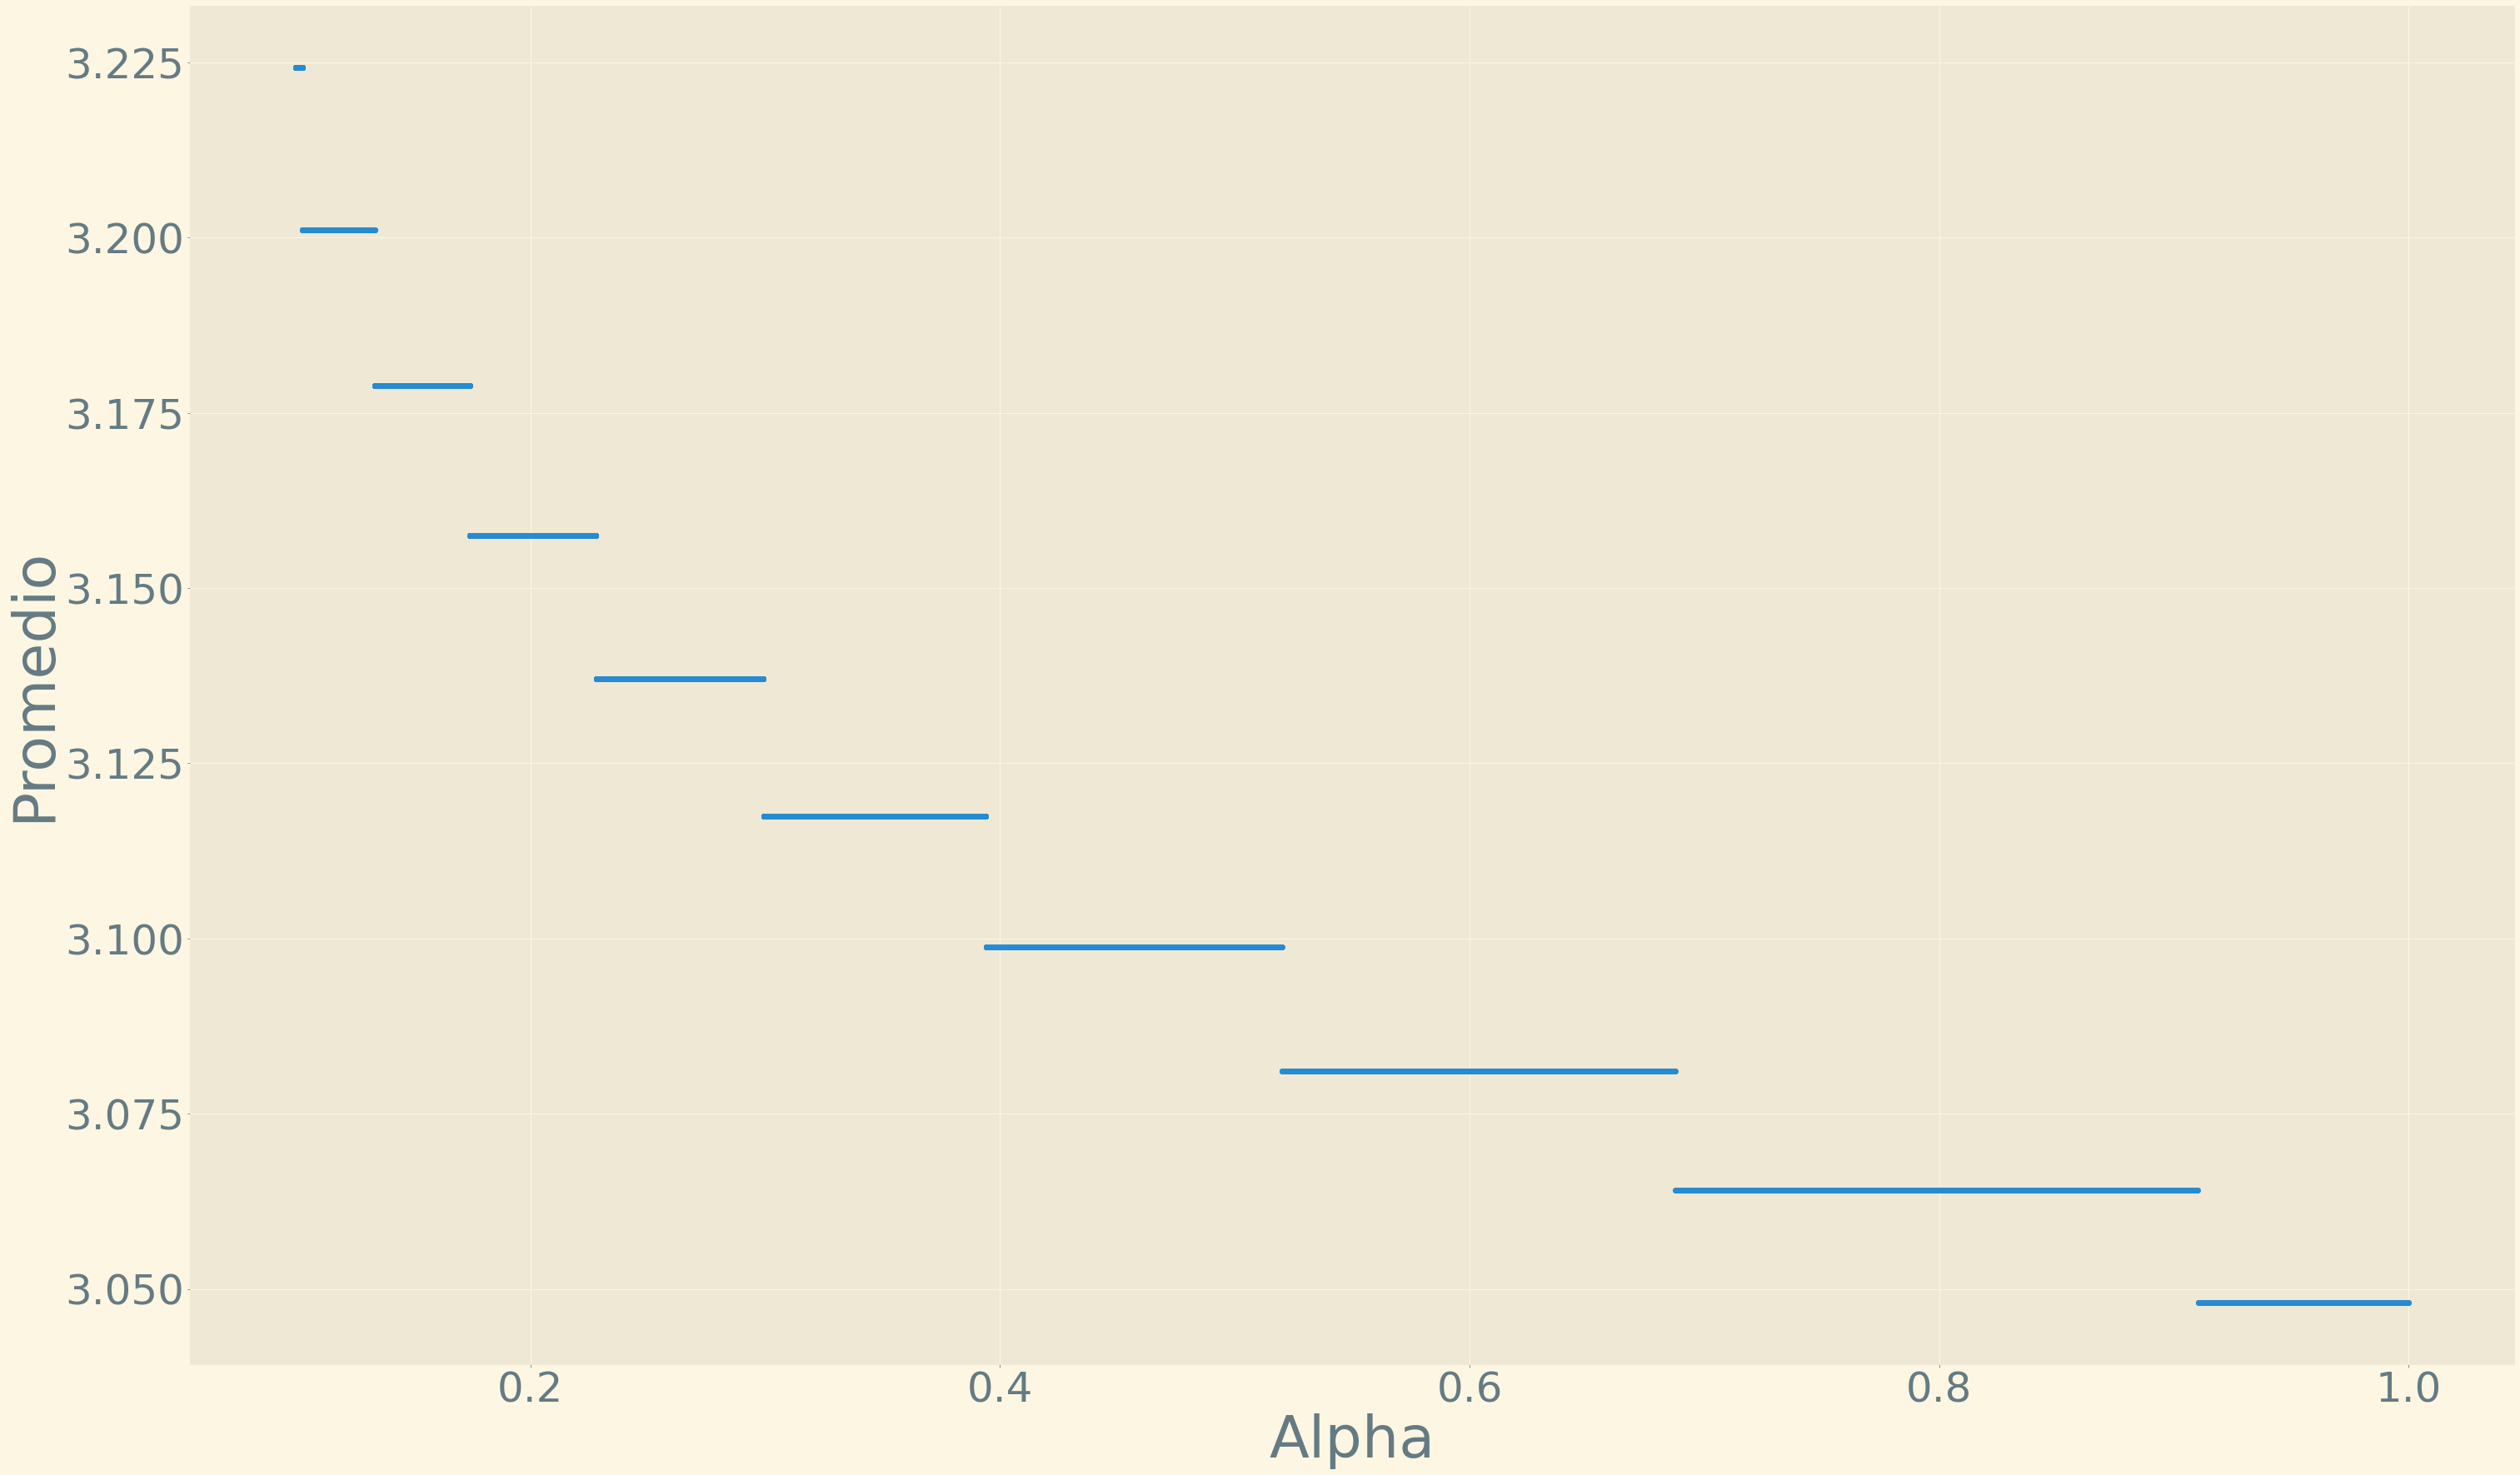

In [33]:

fig = plt.figure(figsize = (50, 30))
plt.scatter(alphas, std_historico)
plt.xlabel("Alpha", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Desviación estandar", fontsize = 70)
plt.yticks(fontsize = 50);